# Final Project
## Neural network: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [3]:
dataset_one_month = pd.read_csv(
    'April_1_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_three_months = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_six_months = pd.read_csv(
    'April_to_Oct_6_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

In [4]:
dataset_one_month = dataset_one_month.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_one_month = dataset_one_month.dropna(axis=0, how='any')
dataset_one_month

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.075579,51.5213
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.083911,51.5200
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.093904,51.5310
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.157184,51.5203
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.144165,51.5107
...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30,52,4,790,48.0,9.083333,7.958333,55.979167,12.270833,30.0,-0.004810,51.5418
2016-04-30,17,33,792,-16.0,9.083333,7.958333,55.979167,12.270833,30.0,-0.104541,51.5055
2016-04-30,14,30,793,-16.0,9.083333,7.958333,55.979167,12.270833,30.0,-0.119559,51.5283


In [5]:
dataset_three_months = dataset_three_months.drop(['index','is_holiday','is_weekend'], axis = 1)
#dataset = dataset.drop(['index'], axis = 1)
dataset_three_months = dataset_three_months.dropna(axis=0, how='any')
dataset_three_months

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.075579,51.5213
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.083911,51.5200
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.093904,51.5310
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.157184,51.5203
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.144165,51.5107
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-01,38,10,720,28.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.205279,51.4872
2016-07-01,20,63,721,-43.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.026263,51.5360
2016-07-01,23,17,722,6.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.058632,51.5246


In [6]:
dataset_six_months = dataset_six_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_six_months = dataset_six_months.dropna(axis=0, how='any')
dataset_six_months

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.50,11.166667,1.0,-0.075579,51.521300
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.50,11.166667,1.0,-0.083911,51.520000
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.50,11.166667,1.0,-0.093904,51.531000
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.50,11.166667,1.0,-0.157184,51.520300
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.50,11.166667,1.0,-0.144165,51.510700
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-30,2,53,785,-51.0,10.680556,10.638889,90.25,4.881944,30.0,-0.010511,51.540900
2016-10-30,1,37,789,-36.0,10.680556,10.638889,90.25,4.881944,30.0,-0.011890,51.538700
2016-10-30,1,35,792,-34.0,10.680556,10.638889,90.25,4.881944,30.0,-0.104541,51.505500


## Plotting

In [7]:
def plot_graph(y_train, y_test_org, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [8]:
def get_MAE(y_test_org, y_pred):
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    return MAE

In [9]:
def get_MSE(y_test_org, y_pred):
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    return MSE

In [10]:
def print_error_calculation(y_test_org, y_pred):
    print('MAE:', get_MAE(y_test_org, y_pred))
    print('MSE:', get_MSE(y_test_org, y_pred))

### Datasets for each stations

In [11]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj_1_m = dataset_one_month.groupby('Station Id')
obj_3_m = dataset_three_months.groupby('Station Id')
obj_6_m = dataset_six_months.groupby('Station Id')

In [12]:
# add datasets to list

df_1_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_1_m.append(obj_1_m.get_group(i))

In [13]:
# add datasets to list

df_3_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_3_m.append(obj_3_m.get_group(i))

In [14]:
# add datasets to list

df_6_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_6_m.append(obj_6_m.get_group(i))

## Neural network

In [15]:
"""
#X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
#y = df[i]['In'].values # Predict
    
X = df_3_m[1].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
y = df_3_m[1].values[:, 3:4] # Total

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

TargetVarScalerFit = 
PredictorScalerFit = TargetVarScaler
 
# Generating the standardized values of X and y
X = PredictorScaler.fit(X).transform(X)
y = TargetVarScaler.fit(y).transform(y)

 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### create ANN model ###

neural_network_model = keras.Sequential([
# Defining the Input layer and FIRST hidden layer, both are same!
layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
layers.Dense(1, kernel_initializer='normal'),
])


# Fitting the ANN to the Training set
neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
neural_network_model.fit(X_train, y_train, epochs = 50, batch_size = 20)

# Generating Predictions on testing data
pred = neural_network_model.predict(X_test)
y_pred = TargetVarScalerFit.inverse_transform(pred)
y_test_org = TargetVarScalerFit.inverse_transform(y_test)
y_train = TargetVarScalerFit.inverse_transform(y_train)
Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
plot_graph(y_train, y_test_org, y_pred, i + 1)
print_error_calculation(y_test_org,y_pred)
"""

"\n#X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional\n#y = df[i]['In'].values # Predict\n    \nX = df_3_m[1].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'\ny = df_3_m[1].values[:, 3:4] # Total\n\n### Sandardization of data ###\nfrom sklearn.preprocessing import StandardScaler\nPredictorScaler = StandardScaler()\nTargetVarScaler = StandardScaler()\n\nTargetVarScalerFit = \nPredictorScalerFit = TargetVarScaler\n \n# Generating the standardized values of X and y\nX = PredictorScaler.fit(X).transform(X)\ny = TargetVarScaler.fit(y).transform(y)\n\n \n# Split the data into training and testing set\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n### create ANN model ###\n\nneural_network_model = keras.Sequential([\n# Defining the Input layer and FIRST hidden layer, both are same!\nlayers.Dense(units=5, input_dim=5, kernel_initializ

# for all stations

## Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

2022-04-19 17:11:44.314297: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1797 - accuracy: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1737 - accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1689 - accuracy: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1624 - accuracy: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1566 - accuracy: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 2.1510 - accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 2.1449 - accuracy: 0.0000e+00
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 2.1395 - accuracy: 0.0000e+00
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 2.1306 - accuracy: 0.0000e+00
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1249 - 

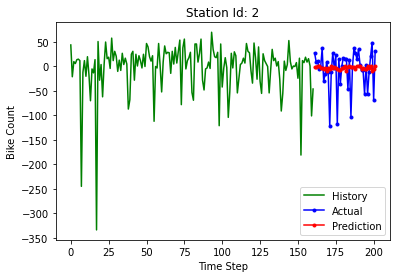

MAE: 28.3470658092964
MSE: 1592.5078266271469
Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 1.0065 - accuracy: 0.0250
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 1.0045 - accuracy: 0.0250
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 1.0036 - accuracy: 0.0250
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 1.0019 - accuracy: 0.0250
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 1.0008 - accuracy: 0.0250
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.9996 - accuracy: 0.0250
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9981 - accuracy: 0.0250
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.0250
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9964 - accuracy: 0.0250
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss:

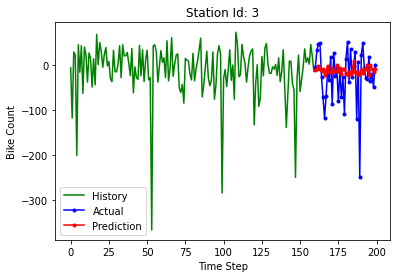

MAE: 42.99916183650494
MSE: 3483.715475633867
Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1195 - accuracy: 0.0248
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1125 - accuracy: 0.0248
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 2.1056 - accuracy: 0.0248
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 2.0979 - accuracy: 0.0248
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 2.0894 - accuracy: 0.0248
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 2.0814 - accuracy: 0.0248
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 2.0725 - accuracy: 0.0248
Epoch 8/50
11/11 [==============================] - 0s 1ms/step - loss: 2.0624 - accuracy: 0.0248
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 2.0517 - accuracy: 0.0248
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss:

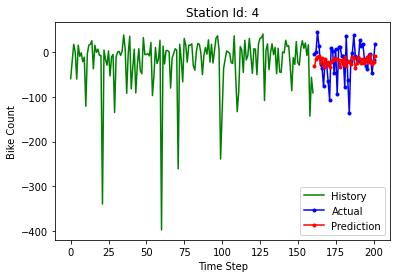

MAE: 29.868811525949617
MSE: 1467.340909459034
Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7612 - accuracy: 0.0062
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.0062
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.0062
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.0062
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7585 - accuracy: 0.0062
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7578 - accuracy: 0.0062
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7573 - accuracy: 0.0062
Epoch 8/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7571 - accuracy: 0.0062
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.0062
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss

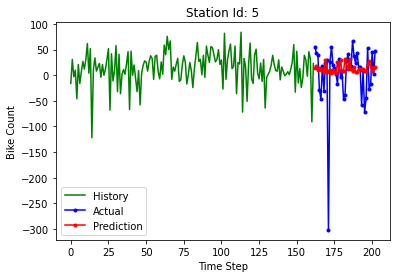

MAE: 36.51833848255436
MSE: 3650.6748411197573
Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.0186
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.0186
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.0186
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.0186
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.0186
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.0186
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.0186
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.0186
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.0186
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss

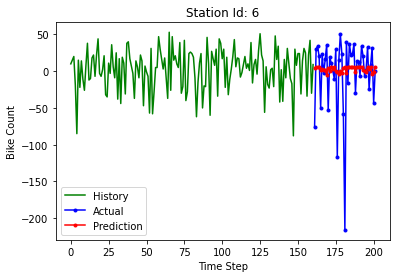

MAE: 31.946755641844213
MSE: 2425.096367030148
Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 0.8918 - accuracy: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.8882 - accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8768 - accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.0000e+00
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.0000e+00
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.0000e+00
Epoch 10/50
11/11 [================

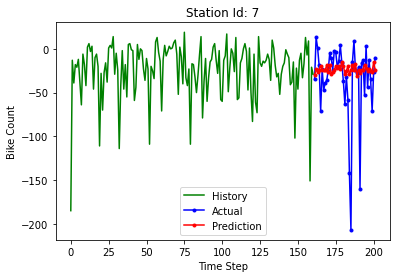

MAE: 25.694362198434224
MSE: 1968.683011388939
Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 1.6082 - accuracy: 0.0250
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 1.6017 - accuracy: 0.0250
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 1.5941 - accuracy: 0.0250
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 1.5864 - accuracy: 0.0250
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 1.5786 - accuracy: 0.0250
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 1.5694 - accuracy: 0.0250
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 1.5598 - accuracy: 0.0250
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 1.5511 - accuracy: 0.0250
Epoch 9/50
11/11 [==============================] - 0s 1ms/step - loss: 1.5411 - accuracy: 0.0250
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss

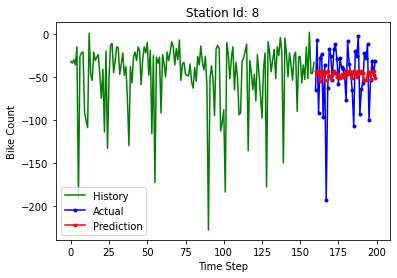

MAE: 27.59315757751465
MSE: 1372.1867224209855
Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7941 - accuracy: 0.0316
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.0316
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.7905 - accuracy: 0.0316
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7891 - accuracy: 0.0316
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7875 - accuracy: 0.0316
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.7856 - accuracy: 0.0316
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.7842 - accuracy: 0.0316
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.7822 - accuracy: 0.0316
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.0316
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss

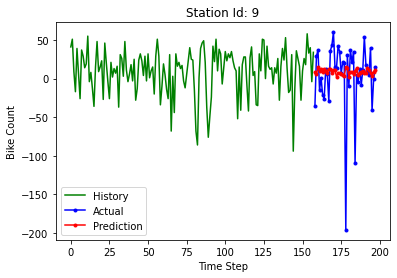

MAE: 27.186128282546996
MSE: 2034.473954444859
Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 1.2535 - accuracy: 0.0373
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 1.2485 - accuracy: 0.0373
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.0373
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 1.2405 - accuracy: 0.0373
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 1.2373 - accuracy: 0.0373
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 1.2332 - accuracy: 0.0373
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 1.2299 - accuracy: 0.0373
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 1.2259 - accuracy: 0.0373
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 1.2227 - accuracy: 0.0373
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss

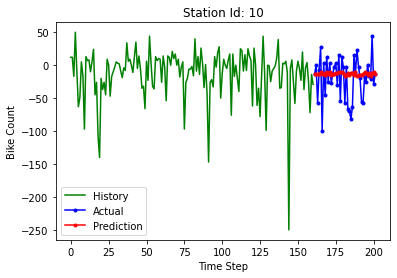

MAE: 24.847718029487424
MSE: 1042.3946601893565

Error Calculation
Average MAE: 27.500149938413283
Average MSE: 1903.707376831409


In [17]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df_6_m[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_6_m[i].values[:, 3:4] # Total
 
    ### Sandardization of data ###
    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()

    # Generating the standardized values of X and y
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i+1)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
    

### Robust Scaler

## advanced

In [18]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'batch_size', 'epochs', 'Accuracy'])
    
    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            test_model = keras.Sequential([
            layers.Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(units =5 , kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(1, kernel_initializer = 'normal'),
            ])

            # Compiling the model
            test_model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            test_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            MAPE = np.mean(100 * (np.abs(y_test - test_model.predict(X_test)) / y_test))
            
            # printing the results of the current iteration
            #print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[TrialNumber, batch_size_trial, epochs_trial, 100-MAPE]],
                                                                      columns = ['TrialNumber', 'batch_size', 'epochs', 'Accuracy'] ))
    return SearchResultsData

In [19]:
result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
result_df

,TrialNumber,batch_size,epochs,Accuracy
0,1,5,5,83.151037
0,2,5,10,-48.103401
0,3,5,50,-717.544821
0,4,5,100,-762.963335
0,5,10,5,89.706022
0,6,10,10,53.828334
0,7,10,50,-597.981094
0,8,10,100,-48.207425
0,9,15,5,101.027305
0,10,15,10,76.787621


<AxesSubplot:xlabel='batch_size'>

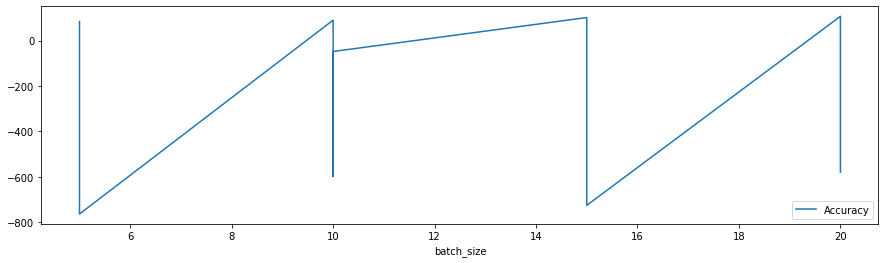

In [20]:
%matplotlib inline
result_df.plot(x='batch_size', y='Accuracy', figsize=(15,4), kind='line')

# parameters 
# e.g. 15-50
# 15 - batch size, 50 - epochs

In [21]:
return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
print(return_df['batch_size'][0], return_df['epochs'][0])

20 5


Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9910 - accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9904 - accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9903 - accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9903 - accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9902 - accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9902 - accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9902 - accuracy: 0.0000e+00
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9904 - accuracy: 0.0000e+00
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9901 - accuracy: 0.0000e+00
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9900 - accuracy: 0.0000e+00

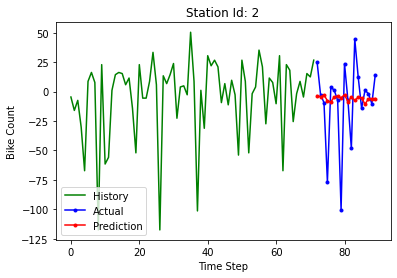

MAE: 22.909838218995198
MSE: 1172.3565491755332
Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.0000e+00


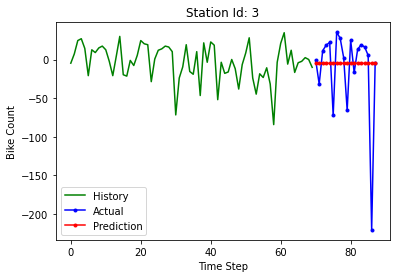

MAE: 35.38589615767088
MSE: 3458.1770459956206
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2179 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2170 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2167 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2155 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2144 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2136 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2127 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2112 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2093 - accuracy: 0.0000e+00
Epoch 10/100
8/8 [==========================

8/8 [==============================] - 0s 2ms/step - loss: 0.9081 - accuracy: 0.0000e+00
Epoch 81/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9069 - accuracy: 0.0000e+00
Epoch 82/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9061 - accuracy: 0.0000e+00
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9047 - accuracy: 0.0000e+00
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9036 - accuracy: 0.0000e+00
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9030 - accuracy: 0.0000e+00
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9013 - accuracy: 0.0000e+00
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9005 - accuracy: 0.0000e+00
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9024 - accuracy: 0.0000e+00
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9010 - accuracy: 0.00

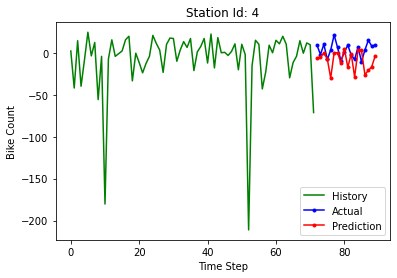

MAE: 14.72761461147729
MSE: 346.79363390558524
Epoch 1/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1358 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.1360 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1350 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1349 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1347 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1344 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1344 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1341 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1336 - accuracy: 0.0000e+00
Epoch 10/50
15/15 [================

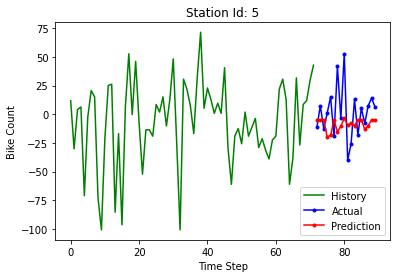

MAE: 20.167538416996052
MSE: 632.7693430125817
Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 0.9858 - accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9854 - accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9854 - accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9851 - accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9853 - accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9852 - accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9852 - accuracy: 0.0000e+00
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9851 - accuracy: 0.0000e+00
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9851 - accuracy: 0.0000e+00
Epoch 10/100
15/15 [======

15/15 [==============================] - 0s 1ms/step - loss: 0.9468 - accuracy: 0.0000e+00
Epoch 80/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.0000e+00
Epoch 81/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9471 - accuracy: 0.0000e+00
Epoch 82/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9468 - accuracy: 0.0000e+00
Epoch 83/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9459 - accuracy: 0.0000e+00
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9458 - accuracy: 0.0000e+00
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9454 - accuracy: 0.0000e+00
Epoch 86/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9448 - accuracy: 0.0000e+00
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9454 - accuracy: 0.0000e+00
Epoch 88/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9

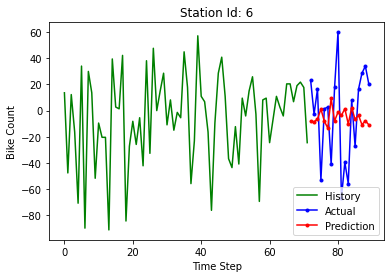

MAE: 32.507637761034744
MSE: 1367.5023435918774
Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.7649 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7635 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7624 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7574 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7550 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7471 - accuracy: 0.0000e+00
Epoch 10/50
15/15 [===============

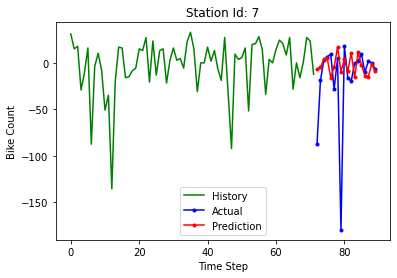

MAE: 24.486154540980397
MSE: 2170.965759803089
Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.9137 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9129 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9130 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9117 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9116 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9115 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9106 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 0.9100 - accuracy: 0.0000e+00
Epoch 10/50
15/15 [================

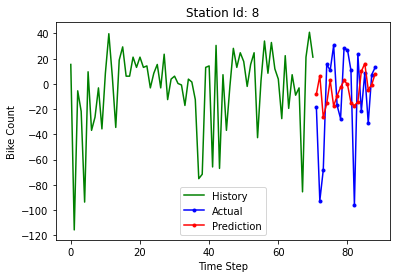

MAE: 30.228313619178
MSE: 1510.1715591038305
Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 0.9870 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.9862 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.9862 - accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.9861 - accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9859 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9857 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9856 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9854 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9850 - accuracy: 0.0000e+00
Epoch 10/100
7/7 [============================

Epoch 81/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.0000e+00
Epoch 82/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.0000e+00
Epoch 83/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.0000e+00
Epoch 84/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.0000e+00
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.0000e+00
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.0000e+00
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.0000e+00
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8753 - accuracy: 0.0000e+00
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.0000e+00
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8739 - a

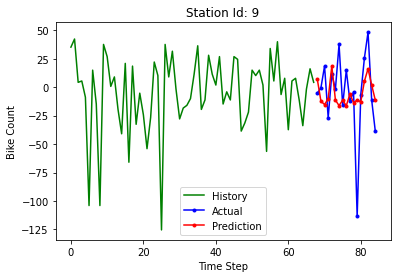

MAE: 23.413724773762077
MSE: 1100.244279160887
Epoch 1/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0161 - accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0151 - accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0148 - accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0144 - accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0141 - accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0137 - accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0131 - accuracy: 0.0000e+00
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0128 - accuracy: 0.0000e+00
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0125 - accuracy: 0.0000e+00
Epoch 10/50
15/15 [================

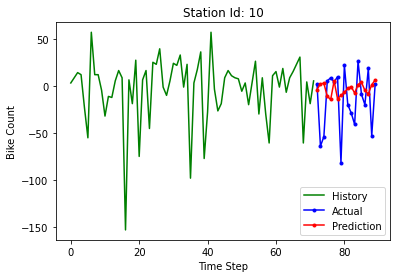

MAE: 28.322615655689415
MSE: 1210.8576850691743

Error Calculation
Average MAE: 23.214933375578408
Average MSE: 1296.983819881818


In [22]:
totalMAE = 0
totalMSE = 0

np.random.seed(7)

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df_3_m[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # Total
 
    ### Sandardization of data ###
    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()
    
    #PredictorScaler = RobustScaler()
    #TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    
    # find best parameters
    result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    best_batch_size = int(return_df['batch_size'][0])
    best_epochs = int(return_df['epochs'][0])
    
    neural_network_model.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    plot_graph(y_train, y_test_org, y_pred, i+1)
    print_error_calculation(y_test_org,y_pred)

    totalMAE += get_MAE(y_test_org,y_pred)
    totalMSE += get_MSE(y_test_org,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/